# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/ML%20spring%202023/Module%207-%20Logistic%20Regression/python/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# K Nearest Neigbors (KNN) - Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/wage.csv")

In [4]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,76900.0,40,93,12,11,2,31,1,0,8.0,8.0
1,80800.0,50,119,18,11,16,37,1,0,14.0,14.0
2,82500.0,40,108,14,11,9,33,1,0,14.0,14.0
3,65000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,56200.0,40,74,11,14,5,34,1,0,6.0,11.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    857 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


## Data preprocessing 

In [6]:
df.isna().sum() /len(df) 

wage       0.000000
hours      0.000000
IQ         0.000000
educ       0.000000
exper      0.000000
tenure     0.000000
age        0.000000
married    0.000000
black      0.000000
meduc      0.083422
feduc      0.207487
dtype: float64

There is 20% missing values in feduc and 8.3% in meduc. We are going to impute feduc using linear regression. For meduc we will be using median meduc just for learning purposes. 

In [8]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    935 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


Fitting models using R-style formulas: https://www.statsmodels.org/dev/example_formulas.html

In [9]:
import statsmodels.formula.api as smf # this is very similar to R programming language. 

In [10]:
reg = smf.ols('feduc ~    IQ + educ +meduc  ', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  feduc   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     150.7
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           3.62e-76
Time:                        16:03:25   Log-Likelihood:                -1758.5
No. Observations:                 741   AIC:                             3525.
Df Residuals:                     737   BIC:                             3543.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8165      0.727     -2.497      0.013      -3.245      -0.388
IQ             0.0164      0.008      2.093      0.037       0.001       0.032
educ           0.3291      0.052      6.329      0.000       0.227       0.431
meduc          0.5430      0.037     14.619      0.000       0.470       0.616
==============================================================================
Omnibus:                        8.269   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                9.005
Skew:                          -0.187   Prob(JB):                       0.0111
Kurtosis:                       3.390   Cond. No.                         795.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
missing_predictions = reg.predict(df[['IQ','educ','meduc']])[df['feduc'].isna()]
missing_predictions

5       9.691238
7      10.316720
11     13.148295
18     11.025223
19      8.129423
         ...    
926     8.327000
927    10.301577
930    10.715012
932     7.193731
934    10.399741
Length: 194, dtype: float64

In [12]:
df.feduc.isna().sum()

194

In [13]:
df.head(10)

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,76900.0,40,93,12,11,2,31,1,0,8.0,8.0
1,80800.0,50,119,18,11,16,37,1,0,14.0,14.0
2,82500.0,40,108,14,11,9,33,1,0,14.0,14.0
3,65000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,56200.0,40,74,11,14,5,34,1,0,6.0,11.0
5,140000.0,40,116,16,14,2,35,1,1,8.0,NaN
6,60000.0,40,91,10,13,0,30,0,0,8.0,8.0
7,108100.0,40,114,18,8,14,38,1,0,8.0,NaN
8,115400.0,45,111,15,13,1,36,1,0,14.0,5.0
9,100000.0,40,95,12,16,16,36,1,0,12.0,11.0


In [14]:
# prediction for 6th observation:

-1.8165 + 0.0164 * 116 + 0.3291 * 16 + 0.5430 * 8

9.6955

In [15]:
reg.predict(df[['IQ','educ','meduc']])[5]

9.691237810837057

In [16]:
df['feduc'].fillna(missing_predictions,axis=0, inplace=True )


In [17]:
df.head(10)

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,76900.0,40,93,12,11,2,31,1,0,8.0,8.000000
1,80800.0,50,119,18,11,16,37,1,0,14.0,14.000000
2,82500.0,40,108,14,11,9,33,1,0,14.0,14.000000
3,65000.0,40,96,12,13,7,32,1,0,12.0,12.000000
4,56200.0,40,74,11,14,5,34,1,0,6.0,11.000000
5,140000.0,40,116,16,14,2,35,1,1,8.0,9.691238
6,60000.0,40,91,10,13,0,30,0,0,8.0,8.000000
7,108100.0,40,114,18,8,14,38,1,0,8.0,10.316720
8,115400.0,45,111,15,13,1,36,1,0,14.0,5.000000
9,100000.0,40,95,12,16,16,36,1,0,12.0,11.000000


## Defining the variables and splitting the data

In [18]:
y = df['wage']
X = df.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [19]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
932,45,77,12,12,10,28,1,1,7.0,7.193731
82,40,96,11,15,3,37,1,0,8.0,8.000000
370,40,123,17,14,7,38,1,0,12.0,6.000000
452,40,109,12,14,1,36,1,0,9.0,7.000000
132,40,97,12,10,4,31,1,0,12.0,12.000000


## Scaling the features: 

The following step is very important for **KNN regression**. Because any variable on the larger scale, has a larger effect on the distance between observations. 

In this data set, because married and black are dummy variables, we don't need to standardize them! 

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [22]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
932,45,77,12,12,10,28,1,1,7.0,7.193731
82,40,96,11,15,3,37,1,0,8.0,8.000000
370,40,123,17,14,7,38,1,0,12.0,6.000000
452,40,109,12,14,1,36,1,0,9.0,7.000000
132,40,97,12,10,4,31,1,0,12.0,12.000000


In [23]:
X_train_sc.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,0.148444,-1.586791,-0.648794,0.092863,0.584802,-1.643250,0.341201,2.637697,-1.355775,-0.976840
1,-0.536120,-0.327846,-1.108793,0.785168,-0.801356,1.281753,0.341201,-0.379119,-0.993719,-0.709917
2,-0.536120,1.461180,1.651197,0.554400,-0.009266,1.606753,0.341201,-0.379119,0.454507,-1.372034
3,-0.536120,0.533537,-0.648794,0.554400,-1.197400,0.956752,0.341201,-0.379119,-0.631663,-1.040976
4,-0.536120,-0.261586,-0.648794,-0.368674,-0.603333,-0.668249,0.341201,-0.379119,0.454507,0.614316


Pay attention to the index of X_train vs X_train_sc! we need to reset the X_train index. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

In [24]:
X_train.reset_index(drop=True, inplace=True)
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,45,77,12,12,10,28,1,1,7.0,7.193731
1,40,96,11,15,3,37,1,0,8.0,8.000000
2,40,123,17,14,7,38,1,0,12.0,6.000000
3,40,109,12,14,1,36,1,0,9.0,7.000000
4,40,97,12,10,4,31,1,0,12.0,12.000000


In [25]:
X_test.reset_index(drop=True, inplace=True)
X_test.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,40,101,13,12,10,30,1,0,12.0,13.000000
1,50,117,18,12,12,37,1,0,12.0,8.000000
2,40,77,12,20,4,38,1,1,12.0,6.000000
3,40,127,18,9,14,36,0,0,10.0,11.615484
4,60,124,16,6,6,29,1,0,12.0,10.000000


In [26]:
categoricals = ['black', 'married']

In [27]:
for cat in categoricals:
    X_train_sc[cat]= X_train[cat]
    X_test_sc[cat]= X_test[cat]

In [28]:
X_train_sc.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,0.148444,-1.586791,-0.648794,0.092863,0.584802,-1.643250,1,1,-1.355775,-0.976840
1,-0.536120,-0.327846,-1.108793,0.785168,-0.801356,1.281753,1,0,-0.993719,-0.709917
2,-0.536120,1.461180,1.651197,0.554400,-0.009266,1.606753,1,0,0.454507,-1.372034
3,-0.536120,0.533537,-0.648794,0.554400,-1.197400,0.956752,1,0,-0.631663,-1.040976
4,-0.536120,-0.261586,-0.648794,-0.368674,-0.603333,-0.668249,1,0,0.454507,0.614316


###  KNN Regression with Sklearn

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
# Fitting KNN regression to the Training set

KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train_sc, y_train)

KNeighborsRegressor()

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [31]:
# Predicting the Test set results
y_hat = KNN_regression.predict(X_test_sc)

In [32]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
434,97500.0,71300.0
238,173000.0,159120.0
531,67500.0,62200.0
157,189900.0,132420.0
601,150000.0,119700.0


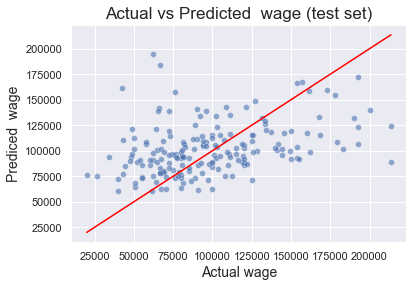

In [33]:
sns.scatterplot(x='y_test', y='y_hat', alpha=0.6, data=predictions)
sns.lineplot(x='y_test', y='y_test', data=predictions, color='red')

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [34]:
KNN_regression.score(X_train_sc, y_train)

0.3593221793862271

In [35]:
KNN_regression.score(X_test_sc, y_test)

0.06485410080708853

In [36]:
X_train_sc.shape

(748, 10)

**Exercise**: 
* Now try k=748. What do you expect to see in the actual vs predicted plot?
* How about when k=1? can you plot the actual vs predictions in the train set?

----

## Performance metrics:

In [37]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

1425686109.09

In [38]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

37758.26

In [39]:
# importing mean_absolute_percentage_error from sklearn.metrics
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_hat)

0.3669303851574638

---

##  Cross validation

In KNN, we use cross validation to find the optimal value of K. 

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train_sc, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [42]:
MSE_CV = round(np.mean(-NMSE),4)
MSE_CV

1631056294.0635

In [43]:
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

40386.338

----------------

## Choosing K
 
Let's plot the RMSE_CV and RMSE_test vs K. 

In [46]:
MSE_CV=[]
MSE_test = []

k=100

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train_sc, y_train)
    MSE_i = np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train_sc, y = y_train, cv = 10 , scoring="neg_mean_squared_error" ))
    MSE_CV.append(MSE_i)
    
    MSE_test.append(np.mean(np.square(y_test - KNN_i.predict(X_test_sc))))
    
optimal_k = pd.DataFrame({'MSE_CV': np.round(MSE_CV,2), 'MSE_test':np.round(MSE_test,2), 'K':range(1,k)})

In [47]:
optimal_k.head(10)

,MSE_CV,MSE_test,K
0,2.311739e+09,2.663669e+09,1
1,1.969113e+09,1.883955e+09,2
2,1.778172e+09,1.628948e+09,3
3,1.663480e+09,1.488210e+09,4
4,1.603689e+09,1.425686e+09,5
5,1.611505e+09,1.411600e+09,6
6,1.577139e+09,1.336099e+09,7
7,1.540310e+09,1.314538e+09,8
8,1.513874e+09,1.296894e+09,9
9,1.486566e+09,1.308977e+09,10


In [53]:
np.argmin(optimal_k['MSE_CV'])

49

In [49]:
optimal_k.loc[np.argmin(optimal_k['MSE_CV']), 'K']

50

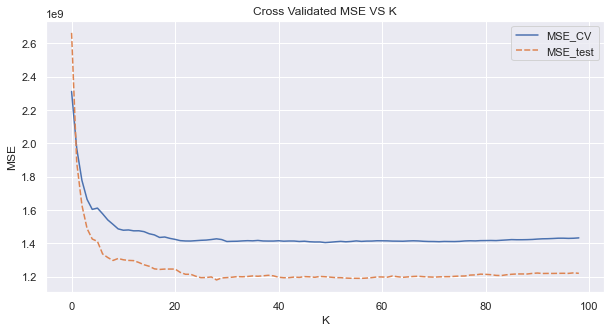

In [51]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k.drop('K', axis=1))
plt.title('Cross Validated MSE VS K')
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

**Exercise**:

* By looking at this graph, What is the optimal K?
* Can you compare the optimal KNN model with multiple regression model? what do you learn?

In [55]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_sc, y_train)
y_hat_linreg = linreg.predict(X_test_sc)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat_linreg)

1096655212.2037752

In [56]:
# this is our best RMSE in the test set with K=51
np.min(optimal_k['MSE_test'])

1180033623.9

---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [ ]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install --pre pycaret

In [57]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.0.rc4'

In [65]:
df.isna().sum()

wage       0
hours      0
IQ         0
educ       0
exper      0
tenure     0
age        0
married    0
black      0
meduc      0
feduc      0
dtype: int64

In [67]:
df_py = df.copy()

In [68]:
df_py.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,76900.0,40,93,12,11,2,31,1,0,8.0,8.0
1,80800.0,50,119,18,11,16,37,1,0,14.0,14.0
2,82500.0,40,108,14,11,9,33,1,0,14.0,14.0
3,65000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,56200.0,40,74,11,14,5,34,1,0,6.0,11.0


In [69]:
from pycaret.regression import *


In [72]:
setup(data=df_py,  target='wage', session_id=555, train_size=0.7, preprocess=True)


,Description,Value
0,Session id,555
1,Target,wage
2,Target type,Regression
3,Data shape,"(935, 11)"
4,Train data shape,"(654, 11)"
5,Test data shape,"(281, 11)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [73]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## Create and tune model

In [85]:
knn_reg = create_model(estimator='knn') # how can you change the number of neighbors?

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:29:34
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31609.6973,1526411904.0000,39069.3203,-0.0906,0.4365,0.4289
1,28976.0605,1683742464.0000,41033.4297,0.0458,0.3872,0.3174
2,28091.8184,1260069504.0000,35497.4570,0.0653,0.3900,0.3354
3,28150.0000,1741220352.0000,41727.9336,0.1454,0.4039,0.3388
4,37077.8477,2854799872.0000,53430.3281,0.0373,0.4942,0.4589
5,31563.3848,1889211776.0000,43465.0625,0.0665,0.4006,0.3501
6,33651.3828,1594383232.0000,39929.7305,-0.1608,0.4571,0.4364
7,28722.7695,1203467264.0000,34691.0273,-0.0519,0.3902,0.3746
8,28715.6914,1360393856.0000,36883.5156,-0.1385,0.4215,0.3542


In [86]:
tuned_knn_reg = tune_model(knn_reg)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:29:38
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28590.2617,1286786816.0000,35871.8125,0.0806,0.4184,0.4023
1,27892.2988,1655517056.0000,40688.0469,0.0618,0.3704,0.2989
2,26232.4062,1065983488.0000,32649.4023,0.2092,0.3527,0.3097
3,26907.5430,1550076544.0000,39371.0117,0.2392,0.3816,0.3344
4,34635.7305,2689418240.0000,51859.6016,0.0931,0.4745,0.4251
5,29392.8711,1877452544.0000,43329.5820,0.0723,0.3835,0.3224
6,31037.8984,1432612864.0000,37849.8711,-0.0430,0.4262,0.3964
7,27327.3789,1090189312.0000,33018.0156,0.0471,0.3853,0.3786
8,26740.9121,1116325632.0000,33411.4609,0.0658,0.4050,0.3628


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Plot Model


In [87]:
plot_model(tuned_knn_reg, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,49
p,2
weights,uniform


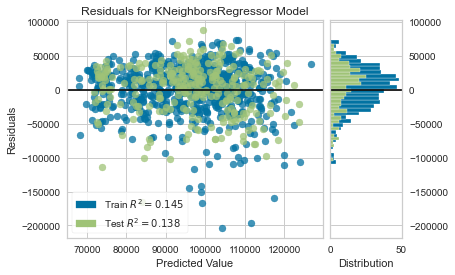

In [88]:
plot_model(tuned_knn_reg, plot = 'residuals')

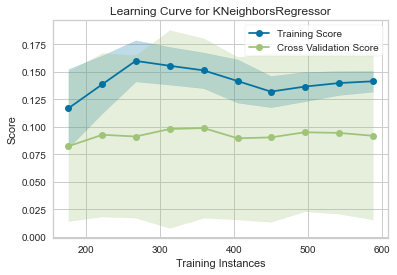

In [89]:
plot_model(tuned_knn_reg, plot = 'learning')

----
Done!

###  Additional links:
1. Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance
2. Behind the scenes of Nearest Neigbor search: https://www.analyticsvidhya.com/blog/2017/11/information-retrieval-using-kdtree/
3. BallTree vs KDTree vs Brute force KNN: https://towardsdatascience.com/tree-algorithms-explained-ball-tree-algorithm-vs-kd-tree-vs-brute-force-9746debcd940